In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
import numpy as np

In [20]:
#select two parameters (column_1 and column_2) to regress against price, will also include points
#x_rank is number of top highest of each of the categories
#percentile is cut off at which highest prices are removed

#example:  RegressWines('country', 'variety', 6, 99):
#takes the top 6 countries and top 6 varities and points (score), and removes the retains the bottom 99% of prices in distribution and regresses to predict prices
#column_1 and column_2 can be any of the following ['country', 'designation', 'province', 'variety', 'price', 'winery']

def RegressWines(column_1, column_2, x_ranks, percentile):

    #import first 150k reviews, and second 130k reviews
    review1 = pd.read_csv(os.path.join('winemag-data_first150k.csv'))
    review2 = pd.read_csv(os.path.join('winemag-data-130k-v2.csv'))

    #concatenate both dataframes by common columns
    review_df = pd.concat([review1, review2], sort=False)

    #drop unnamed index columns
    review_df = review_df.drop(['Unnamed: 0'], axis=1)
    
    #reduce reviews to columns we want to regress against
    model_df = review_df[['country', 'designation', 'points', 'province', 'variety', 'price', 'winery']]

    #drop NaN values
    model_df = model_df.dropna()
    
    #print total number of starting data points
    print(f"Starting data points for analysis: {len(model_df)}")    
    
    #list top x ranked items from column_1 and place in list to train data set
    category_1 = pd.DataFrame(model_df[column_1].value_counts().head(x_ranks))
    category_1 = category_1.index.tolist()
    
    #list top x ranked items from column_2 and place in list to train data set
    category_2 = pd.DataFrame(model_df[column_2].value_counts().head(x_ranks))
    category_2 = category_2.index.tolist()

     
    #reduce dataframe to contain only data points in top x_rank from columns 1 and columns 2 selected
    model_df = model_df.loc[model_df[column_1].isin(category_1)]
    model_df = model_df.loc[model_df[column_2].isin(category_2)]
    
    #print remaining number of data points
    print(f"Filtered Data Points: {len(model_df)}") 
    print("-"*60)
    print(column_1)
    print(category_1)
    print("-"*60)
    print(column_2)
    print(category_2)
    print("-"*60)
    
    #max price is definded as percentile cutoff
    max_price = np.percentile(model_df['price'], percentile)
    print(f"Starting Max Price = {max_price}")
    
    #remove top (100-percentile) of prices
    model_df = model_df.loc[model_df['price']<= max_price]
    
    #print new max price
    print(f"New Max Price = {model_df['price'].max()}")
    
    #define X and y parameters
    X = model_df[['points', column_1, column_2]]
    y = model_df["price"].values.reshape(-1, 1)

    #mirror X into data to assign categorical values
    data = X.copy()

    # using get_dummies with a single column
    X = pd.get_dummies(data, columns=[column_1, column_2])
    
    #define training and testing variables
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    #scale and transform X and y values
    from sklearn.preprocessing import StandardScaler
    X_scaler = StandardScaler().fit(X_train)
    y_scaler = StandardScaler().fit(y_train)
         
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)
    
    # Generate the model and fit it to the scaled training data
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train_scaled, y_train_scaled)

    plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
    plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
    plt.legend()
    plt.title("Residual Plot")
    plt.show()
    
    from sklearn.metrics import mean_squared_error
    
    predictions = model.predict(X_test_scaled)

    MSE = mean_squared_error(y_test_scaled, predictions)
    r2 = model.score(X_test_scaled, y_test_scaled)
    ### END SOLUTION

    return print(f"MSE: {MSE}, R2: {r2}")
    

Starting data points for analysis: 181067
Filtered Data Points: 1294
------------------------------------------------------------
winery
['Williams Selyem', 'Testarossa', 'DFJ Vinhos', 'Concha y Toro', 'Columbia Crest', 'Wines & Winemakers']
------------------------------------------------------------
variety
['Pinot Noir', 'Chardonnay', 'Red Blend', 'Cabernet Sauvignon', 'Riesling', 'Syrah']
------------------------------------------------------------
Starting Max Price = 120.34999999999968
New Max Price = 120.0


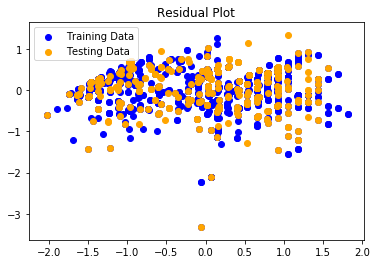

MSE: 0.2802914563730247, R2: 0.7227103608778104


In [22]:
#column_1 and column_2 can be any of the following ['country', 'designation', 'province', 'variety', 'price', 'winery']

RegressWines('winery', 'variety', 6, 99)